In [1]:
from Algorithm import Gaussian_Process
from Algorithm import LA_Bayessian_Quadrature
from Algorithm import Mesh
from Algorithm import Kernels
import Target_Function as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
opt_spy  = tf.Option('call', 0, 600, 0.1672, 0.15,  1, 100)   # SPDR S&P 500 ETF  (广义市场基准)
opt_aapl = tf.Option('call', 1, 200, 0.2613, 0.49,  1, 100)   # Apple
opt_tsla = tf.Option('call', 2, 350, 0.6398, 0.57,  1, 100)   # Tesla
opt_nvda = tf.Option('call', 3, 145, 0.3482, 0.24,  1, 100)   # NVIDIA
opt_amzn = tf.Option('call', 4, 210, 0.2902, 0.24,  1, 100)   # Amazon
opt_meta = tf.Option('call', 5, 700, 0.2924, 0.24,  1, 100)   # Meta
opt_msft = tf.Option('call', 6, 485, 0.1817, 0.15,  1, 100)   # Microsoft
opt_goog = tf.Option('call', 7, 165, 0.3226, 0.32,  1, 100)   # Google
opt_amd  = tf.Option('call', 8, 130, 0.4065, 0.32,  1, 100)   # AMD
opt_mstr = tf.Option('call', 9, 370, 0.5098, 0.49,  1, 100)   # MicroStrategy

def LABQ(D):
    options = [opt_spy, opt_aapl, opt_tsla, opt_nvda, opt_amzn,
               opt_meta, opt_msft, opt_goog, opt_amd, opt_mstr]
    portfolio = tf.OptionPortfolio(
        0.04,50,900,
        options[:D]
    )
    D = len(portfolio.options)
    func = portfolio.target_function
    xx = np.linspace(0., 1., 3)
    grids = np.meshgrid(*([xx] * D),)
    X = np.vstack([g.ravel() for g in grids]).T
    Y = np.array([func(x) for x in X])
    beta = np.concatenate([
    np.array([-0.5]),
    np.random.uniform(-2, 0, size=11 * D)
    ])
    m = [17, 8, 5, 4, 3, 3]
    axes = [np.linspace(0.0, 1.0, m[D-3]) for _ in range(D)]
    grids = np.meshgrid(*axes, indexing='ij')
    mesh = np.stack([g.ravel() for g in grids], axis=1)
    print(mesh.shape)
    GP = Gaussian_Process.GaussianProcess(Kernels.K_lin_mat2_10,beta,X,Y,mesh = mesh)
    print("GP Finished!")
    a, b, times, uncertainties = LA_Bayessian_Quadrature.LABQ_D(
        func,
        GP,
        Mesh.get_points_D,
        n = 30,
        lambd = [30, 1],
        point_mesh = mesh
    )
    return times,uncertainties

In [3]:
t = []
un = []

In [4]:
ti, unce = LABQ(3)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_original_3D.csv", index=False)

(4913, 3)
GP Finished!
Dimensions: 3 , Steps: 31
Step 1 of 31, Time: 12.99, Result: [0.42569507 0.00789137], Uncertainty Rate: 20.87%
Step 2 of 31, Time: 11.79, Result: [0.44655907 0.00670281], Uncertainty Rate: 18.33%
Step 3 of 31, Time: 13.74, Result: [0.48262893 0.00567508], Uncertainty Rate: 15.61%
Step 4 of 31, Time: 12.74, Result: [0.51453097 0.0048896 ], Uncertainty Rate: 13.59%
Step 5 of 31, Time: 11.98, Result: [0.53616141 0.00404317], Uncertainty Rate: 11.86%
Step 6 of 31, Time: 12.06, Result: [0.54631635 0.00313552], Uncertainty Rate: 10.25%
Step 7 of 31, Time: 12.17, Result: [0.55461992 0.00259217], Uncertainty Rate: 9.18%
Step 8 of 31, Time: 12.13, Result: [0.57436836 0.00218088], Uncertainty Rate: 8.13%
Step 9 of 31, Time: 12.19, Result: [0.58690205 0.00172017], Uncertainty Rate: 7.07%
Step 10 of 31, Time: 12.70, Result: [0.59271482 0.00156118], Uncertainty Rate: 6.67%
Step 11 of 31, Time: 12.56, Result: [0.58960148 0.00141552], Uncertainty Rate: 6.38%
Step 12 of 31, Time

In [5]:
ti, unce = LABQ(4)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_original_4D.csv", index=False)

(4096, 4)
GP Finished!
Dimensions: 4 , Steps: 31
Step 1 of 31, Time: 22.81, Result: [0.42845754 0.00414158], Uncertainty Rate: 15.02%
Step 2 of 31, Time: 70.64, Result: [0.44666523 0.00380791], Uncertainty Rate: 13.82%
Step 3 of 31, Time: 23.14, Result: [0.47065686 0.00349908], Uncertainty Rate: 12.57%
Step 4 of 31, Time: 21.85, Result: [0.49665382 0.00324901], Uncertainty Rate: 11.48%
Step 5 of 31, Time: 26.03, Result: [0.50823645 0.00291977], Uncertainty Rate: 10.63%
Step 6 of 31, Time: 37.93, Result: [0.52709459 0.00265938], Uncertainty Rate: 9.78%
Step 7 of 31, Time: 21.41, Result: [0.54186385 0.00237648], Uncertainty Rate: 9.00%
Step 8 of 31, Time: 33.24, Result: [0.55902258 0.00213809], Uncertainty Rate: 8.27%
Step 9 of 31, Time: 35.15, Result: [0.57211164 0.00188139], Uncertainty Rate: 7.58%
Step 10 of 31, Time: 16.74, Result: [0.57670364 0.00180058], Uncertainty Rate: 7.36%
Step 11 of 31, Time: 19.26, Result: [0.58332165 0.00172591], Uncertainty Rate: 7.12%
Step 12 of 31, Time:

In [6]:
ti, unce = LABQ(5)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_original_5D.csv", index=False)

(3125, 5)
GP Finished!
Dimensions: 5 , Steps: 31
Step 1 of 31, Time: 155.99, Result: [0.41370845 0.00192644], Uncertainty Rate: 10.61%
Step 2 of 31, Time: 43.49, Result: [0.42344046 0.00185224], Uncertainty Rate: 10.16%
Step 3 of 31, Time: 43.61, Result: [0.43544926 0.00177778], Uncertainty Rate: 9.68%
Step 4 of 31, Time: 74.82, Result: [0.44441076 0.00171403], Uncertainty Rate: 9.32%
Step 5 of 31, Time: 95.64, Result: [0.45995283 0.0016612 ], Uncertainty Rate: 8.86%
Step 6 of 31, Time: 99.24, Result: [0.47227756 0.00159578], Uncertainty Rate: 8.46%
Step 7 of 31, Time: 145.69, Result: [0.4826611  0.00152822], Uncertainty Rate: 8.10%
Step 8 of 31, Time: 49.17, Result: [0.49153313 0.00146064], Uncertainty Rate: 7.78%
Step 9 of 31, Time: 92.07, Result: [0.50200279 0.00139656], Uncertainty Rate: 7.44%
Step 10 of 31, Time: 83.89, Result: [0.51043461 0.00134879], Uncertainty Rate: 7.20%
Step 11 of 31, Time: 75.79, Result: [0.51487538 0.00129347], Uncertainty Rate: 6.99%
Step 12 of 31, Time: 

In [7]:
ti, unce = LABQ(6)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_original_6D.csv", index=False)

(4096, 6)
GP Finished!
Dimensions: 6 , Steps: 31
Step 1 of 31, Time: 2656.32, Result: [0.34033356 0.00071568], Uncertainty Rate: 7.86%
Step 2 of 31, Time: 599.66, Result: [0.34616638 0.00069585], Uncertainty Rate: 7.62%
Step 3 of 31, Time: 714.38, Result: [0.35319312 0.00067371], Uncertainty Rate: 7.35%
Step 4 of 31, Time: 596.59, Result: [0.35797733 0.00065415], Uncertainty Rate: 7.14%
Step 5 of 31, Time: 215.30, Result: [0.3647399  0.00063422], Uncertainty Rate: 6.90%
Step 6 of 31, Time: 743.09, Result: [0.37031031 0.00061836], Uncertainty Rate: 6.72%
Step 7 of 31, Time: 590.18, Result: [0.37455998 0.0006021 ], Uncertainty Rate: 6.55%
Step 8 of 31, Time: 601.23, Result: [0.37832463 0.00058656], Uncertainty Rate: 6.40%
Step 9 of 31, Time: 547.80, Result: [0.38279395 0.00057134], Uncertainty Rate: 6.24%
Step 10 of 31, Time: 266.76, Result: [0.38646267 0.00055743], Uncertainty Rate: 6.11%
Step 11 of 31, Time: 467.40, Result: [0.39095124 0.00054452], Uncertainty Rate: 5.97%
Step 12 of 31

In [8]:
ti, unce = LABQ(7)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_original_7D.csv", index=False)

(2187, 7)
GP Finished!
Dimensions: 7 , Steps: 31


KeyboardInterrupt: 

In [ ]:
ti, unce = LABQ(8)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_original_8D.csv", index=False)

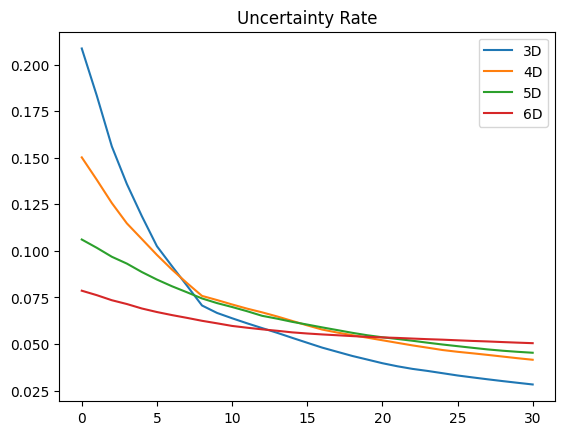

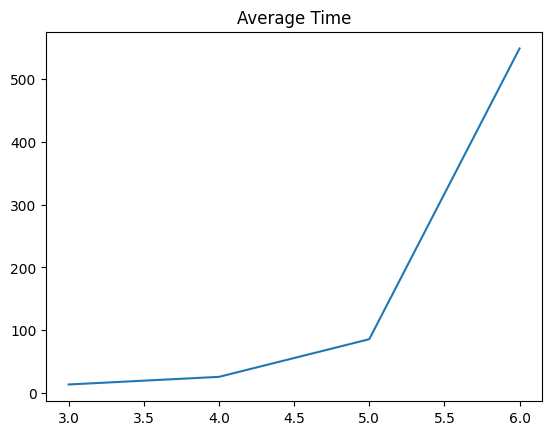

In [11]:
dimension = 6
avg_time = []
for i in range(dimension - 2):
    plt.plot(range(len(un[i])), un[i], label=f"{i+3}D")
    avg_time.append(np.mean(t[i]))
plt.title("Uncertainty Rate")
plt.legend()
plt.show()
plt.plot(range(3, dimension + 1),avg_time)
plt.title("Average Time")
plt.show()
